# Canadian Health Community Survey: cycle 3 - 2005

MA,
Ruhid Mirzayev - 2020

    Questions have been solved in this project.
    
1. Average hospital stay and physisian visit in Canada in 2005.
2. Defining problem 1 by age groups( aged 30 and below, 30-64, and 65 and more). Does cancer varies by age groups?
3. Finding demand for healthcare. Do walking for exercise, age, income, affect demand for healthcare?
4. Defining cancer by using age, income and BMI( Body Mass Index)

In [1]:
# Importing essential libraries of Python as below:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

from pandas import Series, DataFrame
from matplotlib import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 5,4

In [16]:
# Importing Data from Macbook:
address = ('/Users/ruhidmirzayev/Downloads/myportfolio/cycle_2005/cchs-82M0013-E-2005-c3-1-main-file_F1.csv')
df=pd.read_csv(address)


In [17]:
df.columns

Index(['ADME_RNO', 'GEOEGPRV', 'GEOEDPMF', 'GEOEGSHR', 'SAME_TYP', 'ADME_PRX',
       'ADME_N09', 'ADME_N10', 'ADME_N11', 'DHHEGAGE',
       ...
       'FSCE_110', 'FSCE_120', 'FSCE_121', 'FSCE_130', 'FSCE_140', 'FSCE_141',
       'FSCE_150', 'FSCE_160', 'FSCEDHFS', 'WTSE_M'],
      dtype='object', length=1284)

 #### We need to choose variables we need
 The variable names need to be defined as a understandable way. We edited their names from Variable Description Handbook

In [18]:
# We need to choose 11 variables out of 1284
df= df[['DHHEGAGE','DHHE_SEX', 'CCCE_131','INCEGPER', 'HWTEGHTM','HWTEGWTK','HWTEGBMI','HCUE_01', 'HCUEG01A', 'HCUEG02A', 'PACE_1A' ]]
df.columns = ['age','sex', 'cancer','income','height', 'weight', 'BMI', 'overnight_patient', 'hosp_stay', 'physisian_visit', 'walking']
df.head()

,age,sex,cancer,income,height,weight,BMI,overnight_patient,hosp_stay,physisian_visit,walking
0,5,1,2,4,1.854,90.00,26.18,2,96,1,1
1,15,2,2,3,1.575,56.70,22.86,2,96,3,1
2,6,1,2,3,1.651,108.00,39.62,2,96,2,2
3,15,2,2,2,1.575,69.75,28.12,2,96,1,1
4,16,2,2,99,1.575,58.50,23.58,2,96,2,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132221 entries, 0 to 132220
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                132221 non-null  int64  
 1   sex                132221 non-null  int64  
 2   cancer             132221 non-null  int64  
 3   income             132221 non-null  int64  
 4   height             132221 non-null  float64
 5   weight             132221 non-null  float64
 6   BMI                132221 non-null  float64
 7   overnight_patient  132221 non-null  int64  
 8   hosp_stay          132221 non-null  int64  
 9   physisian_visit    132221 non-null  int64  
 10  walking            132221 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 11.1 MB


In [21]:
df.describe()

,age,sex,cancer,income,height,weight,BMI,overnight_patient,hosp_stay,physisian_visit,walking
count,132221.000000,132221.000000,132221.000000,132221.000000,132221.000000,132221.000000,132221.000000,132221.000000,132221.000000,132221.000000,132221.000000
mean,8.685859,1.542092,1.987468,21.071388,1.756112,101.120540,62.423490,1.910937,87.784308,3.667231,1.443666
std,4.187014,0.498227,0.210958,37.005055,0.765397,159.312177,185.801218,0.332494,25.920900,7.909545,1.125446
min,1.000000,1.000000,1.000000,1.000000,1.270000,30.600000,11.910000,1.000000,1.000000,0.000000,1.000000
25%,5.000000,1.000000,2.000000,2.000000,1.600000,60.750000,22.200000,2.000000,96.000000,1.000000,1.000000
50%,9.000000,2.000000,2.000000,4.000000,1.676000,72.000000,25.310000,2.000000,96.000000,2.000000,1.000000
75%,12.000000,2.000000,2.000000,5.000000,1.778000,85.500000,28.890000,2.000000,96.000000,4.000000,2.000000
max,16.000000,2.000000,9.000000,99.000000,9.999000,999.990000,999.990000,9.000000,99.000000,99.000000,9.000000


The mean age is 8.7 and income is 21. Clearly, all patients can not stay 96 days exactly. Something is wrong with this data. We need to check variable description which comes with data when we download it from database. In the next cell, I am going to explain the chosen variables.

## Variable descriptions:


1. DHHEGAE - age 
     
1 = 12-14, 
2 = 15-17, 
3 = 18-19, 
4 = 20-24, 
5 = 25-29, 
6 = 30-34, 
7 = 35-39, 
8 = 40-44, 
9 = 45-49, 
10 = 50-54, 
11 = 55-59, 
12 = 60-64, 
13 = 65-69, 
14 = 70-74, 
15 = 75-79, 
16 = 80 and more

2. DHHE_SEX - sex

1 - Male
2 - Female

3. CCCE_131 - cancer

1 - yes
2 - no
6 - not applicable
7 - do not know
8 - refusal
9 - not stated

4. INCEGPER - Total houshold income

1 =no income, 
2 = less than 15000, 
3 = 15000-29999, 
4 = 30000-49999, 
5 = 50000-79999, 
6 = 80000 or more. 
96 = not aplicable
97 = do not know
98 = refusal
99 = not stated

5. HWTEGHTM - height in metres

1.27 - 1.257 to 1.282
1.295 - 1.283 to 1.307
...
...
Averages until 2.134
But 9.999 - not stated

6. HWTEGWTK - weight in kgs

999.99 - not stated 

7. HWTEGBMI - BMI(Body Mass Index)

999.99 - Not Stated - Pregnant women


8. HCUE_01 - Overnight patient

1 = yes
2 = no
6 = not applicable
7 = do not know
8 = refusal
9 = not stated

9. If yes in HCUE_01

HCUEG01A - Number of nights as a patient

1 = 1
2 = 2
3 = 3

...

30 = 30
31 = 31 and more
96 = not applicable (1 - Check Notes below)
97 = do not know
98 = refusal
99 = not stated (2 - Check notes below) 

10. HCUEG02A - Physisian visit or number of consultations
1 = 1
2 = 2
3 = 3
...

30 = 30
31 = 31 and more
96 = not applicable
97 = do not know
98 = refusal
99 = not stated

11. PACE_1A - Last three month walking

1 = yes
2 = no
6 = not applicable
7 = do not know
8 = refusal
9 = not stated (3 check Notes below)

    Notes:

(1) They said 'no' in HCUE_01. It implies that we need to replace them with 0.

(2) From description of variables guide,in HCUEG01A 99 = 1 night stay, this is because these people have not been questioned in HCUE_01. There are couple of previous variables which also define hospital stay or number of nights as a patient. Thus it is useless to ask again this question

(3) People did interview by proxy.

### Cleaning the data

In [28]:
df.replace(to_replace = {
    'age': {1:13, 2:16, 3:18.5, 4:22, 5:27, 6:32, 7:37, 8:42, 9:47, 10:52, 11:57, 12:62, 13:67, 14:72, 15:77, 16:80},
    'sex': {2:0},
    'cancer': {2:0, 6: np.NaN, 7:np.NaN, 8: np.NaN, 9:np.NaN},
    'income': {1:0, 2:7500, 3:22500, 4:40000, 5:65000, 6:80000, 96: np.NaN, 97: np.NaN, 98: np.NaN, 99: np.NaN},
    'height': {9.999 : np.NaN},
    'weight': {999.99: np.NaN},
    'BMI':{999.99: np.NaN},
    'hosp_stay': {96:0, 97: np.NaN, 98: np.NaN, 99:1},
    'overnight_patient': {2:0, 7:np.NaN, 8:np.NaN, 9:np.NaN},
    'physisian_visit': {96:np.NaN, 97:np.NaN, 98:np.NaN, 99:np.NaN},
    'walking':{2:0, 6: np.NaN, 7: np.NaN, 8:np.NaN, 9: np.NaN}}, inplace = True)
df.head()

,age,sex,cancer,income,height,weight,BMI,overnight_patient,hosp_stay,physisian_visit,walking
0,27.0,1,0.0,40000.0,1.854,90.00,26.18,0.0,0,1.0,1.0
1,77.0,0,0.0,22500.0,1.575,56.70,22.86,0.0,0,3.0,1.0
2,32.0,1,0.0,22500.0,1.651,108.00,39.62,0.0,0,2.0,0.0
3,77.0,0,0.0,7500.0,1.575,69.75,28.12,0.0,0,1.0,1.0
4,80.0,0,0.0,NaN,1.575,58.50,23.58,0.0,0,2.0,1.0


In [32]:
df.describe()

,age,sex,cancer,income,height,weight,BMI,overnight_patient,hosp_stay,physisian_visit,walking
count,132221.000000,132221.000000,132109.000000,107531.000000,131110.000000,128237.000000,127228.000000,132134.000000,132221.000000,131582.000000,129641.000000
mean,51.326979,0.457908,0.017311,31303.042843,1.686264,73.194934,25.629156,0.093163,0.631072,3.204268,0.701152
std,18.698909,0.498227,0.130430,23264.093623,0.100795,16.951823,5.066087,0.290662,3.201133,4.302844,0.457755
min,18.500000,0.000000,0.000000,0.000000,1.270000,30.600000,11.910000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,0.000000,0.000000,7500.000000,1.600000,60.750000,22.130000,0.000000,0.000000,1.000000,0.000000
50%,52.000000,0.000000,0.000000,22500.000000,1.676000,72.000000,24.910000,0.000000,0.000000,2.000000,1.000000
75%,67.000000,1.000000,0.000000,40000.000000,1.753000,83.250000,28.270000,0.000000,0.000000,4.000000,1.000000
max,80.000000,1.000000,1.000000,80000.000000,1.956000,135.000000,54.960000,1.000000,31.000000,31.000000,1.000000


As we see above, income, age and so on variables look normal after replacing them.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132221 entries, 0 to 132220
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                132221 non-null  float64
 1   sex                132221 non-null  int64  
 2   cancer             132109 non-null  float64
 3   income             107531 non-null  float64
 4   height             131110 non-null  float64
 5   weight             128237 non-null  float64
 6   BMI                127228 non-null  float64
 7   overnight_patient  132134 non-null  float64
 8   hosp_stay          132221 non-null  int64  
 9   physisian_visit    131582 non-null  float64
 10  walking            129641 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 11.1 MB


## Dealing with null values

The number of null values are not considerable, that is why we can drop all the null values from our data.

The alternative is to replace null values with the mean of variables, but in our case some variable are catigorical and it will not make a sence if we do it.

In [34]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102770 entries, 0 to 132219
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                102770 non-null  float64
 1   sex                102770 non-null  int64  
 2   cancer             102770 non-null  float64
 3   income             102770 non-null  float64
 4   height             102770 non-null  float64
 5   weight             102770 non-null  float64
 6   BMI                102770 non-null  float64
 7   overnight_patient  102770 non-null  float64
 8   hosp_stay          102770 non-null  int64  
 9   physisian_visit    102770 non-null  float64
 10  walking            102770 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 9.4 MB


In [76]:
df.describe()

,age,sex,cancer,income,height,weight,BMI,overnight_patient,hosp_stay,physisian_visit,walking,age_groups
count,102770.000000,102770.000000,102770.000000,102770.000000,102770.00000,102770.000000,102770.000000,102770.000000,102770.000000,102770.000000,102770.000000,102770.000000
mean,49.658037,0.470390,0.017573,31676.072784,1.69282,74.683139,25.979663,0.091865,0.592809,3.207969,0.708417,2.078223
std,18.243603,0.499125,0.131395,23313.296703,0.09926,16.595245,5.019772,0.288837,3.030754,4.276634,0.454494,0.634932
min,18.500000,0.000000,0.000000,0.000000,1.39700,38.700000,12.590000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32.000000,0.000000,0.000000,7500.000000,1.62600,63.000000,22.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,47.000000,0.000000,0.000000,22500.000000,1.70200,72.000000,25.400000,0.000000,0.000000,2.000000,1.000000,2.000000
75%,62.000000,1.000000,0.000000,40000.000000,1.77800,85.225000,28.670000,0.000000,0.000000,4.000000,1.000000,2.000000
max,80.000000,1.000000,1.000000,80000.000000,1.95600,135.000000,54.960000,1.000000,31.000000,31.000000,1.000000,3.000000


### Question 1

#### Average hospital stay and physisian visit in Canada in 2005.

In [37]:
df[['hosp_stay', 'physisian_visit']].describe()

,hosp_stay,physisian_visit
count,102770.000000,102770.000000
mean,0.592809,3.207969
std,3.030754,4.276634
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,2.000000
75%,0.000000,4.000000
max,31.000000,31.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a220d52d0>]],
      dtype=object)

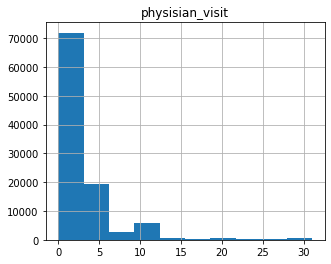

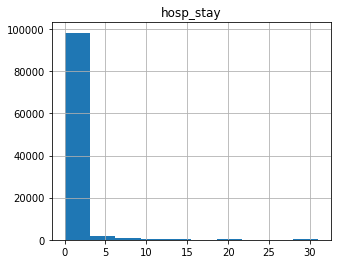

In [69]:
df.hist(column = 'physisian_visit')
df.hist(column = 'hosp_stay')

### Question 2

#### Defining hospital stay and physician visit by age groups

In order to find out the problem above by age groups, we need to create new variable which is catigorical and has only three values such as 1: 30 years and below, 2: 30 to 64 and 3: 65 and more.


In [38]:
df['age_groups'] = df['age'].replace([13,16,18.5,22,27,32,37,42,47,52,57,62,67,72,77,80], [1,1,1,1,1,2,2,2,2,2,2,2,3,3,3,3])
df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,sex,cancer,income,height,weight,BMI,overnight_patient,hosp_stay,physisian_visit,walking,age_groups
0,27.0,1,0.0,40000.0,1.854,90.00,26.18,0.0,0,1.0,1.0,1.0
1,77.0,0,0.0,22500.0,1.575,56.70,22.86,0.0,0,3.0,1.0,3.0
2,32.0,1,0.0,22500.0,1.651,108.00,39.62,0.0,0,2.0,0.0,2.0
3,77.0,0,0.0,7500.0,1.575,69.75,28.12,0.0,0,1.0,1.0,3.0
7,32.0,1,0.0,40000.0,1.778,60.30,19.07,0.0,0,0.0,1.0,2.0


In [40]:
#Defining problem by age groups
df[['hosp_stay','physisian_visit', 'cancer']].groupby(df['age_groups']).mean()

,hosp_stay,physisian_visit,cancer
age_groups,,,
1.0,0.347737,2.816578,0.001822
2.0,0.455733,3.047273,0.012321
3.0,1.091461,3.863228,0.041000


As we see from above,  If the age of  groups are increasing, cancer, hospital stay, and physisian visits rises as well. 

### Question 3

#### Linear regression
Let's say healthcare demand is hospital stay. 

hosp_stay = b + income * b1 + walking * b2 + income * b3 + u. We need to find b1, b2 and b3.

In [42]:
# First let'check Pearson correlation
df[['hosp_stay', 'age', 'income', 'walking']].corr()
# The results below do not show strong correlation

,hosp_stay,age,income,walking
hosp_stay,1.000000,0.093003,-0.069842,-0.034373
age,0.093003,1.000000,-0.142848,-0.040870
income,-0.069842,-0.142848,1.000000,0.026196
walking,-0.034373,-0.040870,0.026196,1.000000


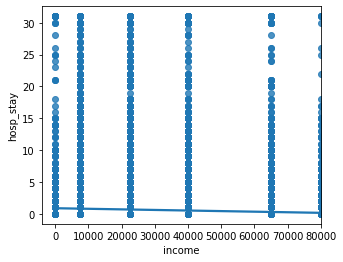

In [75]:
import seaborn as sb
m = df[['income']]
n = df['hosp_stay']
sb.regplot(m,n, data = df)

In [53]:
## Linear regressin by Stats Models
import statsmodels.api as sm


X = df[['age', 'income', 'walking']]
y = df['hosp_stay']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              hosp_stay   R-squared (uncentered):                   0.049
Model:                            OLS   Adj. R-squared (uncentered):              0.049
Method:                 Least Squares   F-statistic:                              1750.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                        0.00
Time:                        17:10:57   Log-Likelihood:                     -2.5915e+05
No. Observations:              102770   AIC:                                  5.183e+05
Df Residuals:                  102767   BIC:                                  5.183e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0171      0.000     54.583      0.000       0.017       0.018
income     -5.961e-06   3.62e-07    -16.477      0.000   -6.67e-06   -5.25e-06
walking       -0.1261      0.019     -6.765      0.000      -0.163      -0.090
==============================================================================
Omnibus:                   132019.994   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         17611281.868
Skew:                           7.394   Prob(JB):                         0.00
Kurtosis:                      65.403   Cond. No.                     7.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we see p values are statistically significant, it enables us to say that if age increases hospital stay increases as well. On the contrary, there is negative correlation between income and hospital stay. The same patterns can be seen for walking variables.

### Question 4

Defining cancer by age, BMI and income

K nearest neighbor model is used

In [54]:
# Defining dependent and target variables
X1 = df[['age', 'income', 'BMI']] # independent variables
y1 = df['cancer'] # Binary target variable


#### Normalizing the data

This process gives data zero mean and unit variance

In [56]:
# importing libraries
from sklearn import preprocessing


In [59]:
X1 = preprocessing.StandardScaler().fit(X1).transform(X1.astype(float))
X1[0:5]

array([[-1.24197764,  0.35704808,  0.03990975],
       [ 1.49872232, -0.39360016, -0.62147814],
       [-0.96790764, -0.39360016,  2.71733542],
       [ 1.49872232, -1.03701294,  0.4263834 ],
       [-0.96790764,  0.35704808, -1.37649624]])

#### Training the data

We will use train test split in order to make the best out of sample prediction.

In [60]:
from sklearn.model_selection import train_test_split # the library
X1_train, X1_test, y1_train, y1_test = train_test_split( X1, y1, test_size=0.2, random_state=4)
print ('Train set:', X1_train.shape,  y1_train.shape)
print ('Test set:', X1_test.shape,  y1_test.shape)

Train set: (82216, 3) (82216,)
Test set: (20554, 3) (20554,)


In [61]:
# Library fot k nearest
from sklearn.neighbors import KNeighborsClassifier
# Training
k = 4  # We choose random numbers for k value
n_gh = KNeighborsClassifier(n_neighbors = k).fit(X1_train,y1_train)
n_gh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

#### Predicting 

In [62]:
y_hat = n_gh.predict(X1_test)
y_hat[0:5]

array([0., 0., 0., 0., 0.])

#### Accuracy assessment

In [63]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y1_train, n_gh.predict(X1_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y1_test, y_hat))

Train set Accuracy:  0.9820229638999708
Test set Accuracy:  0.9840420356135059


In [64]:
# What if we choose k = 6
k = 6
n_gh6 = KNeighborsClassifier(n_neighbors = k).fit(X1_train,y1_train)
y_hat6 = n_gh6.predict(X1_test)
print("Train set Accuracy: ", metrics.accuracy_score(y1_train, n_gh6.predict(X1_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y1_test, y_hat6))

Train set Accuracy:  0.9819743115695242
Test set Accuracy:  0.9842366449352924


#### Choosing right value for K

In [66]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    n_gh_k = KNeighborsClassifier(n_neighbors = n).fit(X1_train,y1_train)
    y_hat_k=n_gh_k.predict(X1_test)
    mean_acc[n-1] = metrics.accuracy_score(y1_test, y_hat_k)

    
    std_acc[n-1]=np.std(y_hat_k == y1_test)/np.sqrt(y_hat_k.shape[0])

mean_acc

array([0.9675489 , 0.98379877, 0.98272842, 0.98404204, 0.98399338,
       0.98423664, 0.98423664, 0.98423664, 0.98423664])

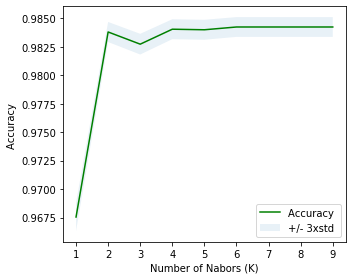

In [67]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [68]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9842366449352924 with k= 6
